In [2]:
import tensorflow as tf
from IPython.display import clear_output
from tensorflow.examples.tutorials.mnist import input_data
mnist2 = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
from tensorflow.keras.datasets import mnist

#Importing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_vector_size = 28*28

#Normalization
x_train = x_train.astype(float)
x_test = x_test.astype(float)

#Flattening Feature
# x_train = x_train.reshape(x_train.shape[0], image_vector_size)
# x_test = x_test.reshape(x_test.shape[0], image_vector_size)

#Converting Target variable from scaler to softmax class
import keras
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


In [4]:
#Parameters
learning_rate  = 0.001
training_epoch = 5
N = 784
n_hidden_1 = 392
n_hidden_2 = 196
n_hidden_3 = 392
batch_size = 50
n_input    = N
lamda      = 0.3
x = tf.placeholder("float",[None,n_input])
y = tf.placeholder("float",[None,n_input])
test_examples = 20

In [5]:
import numpy as np
random_indexs = np.random.randint(low=0,high=len(x_test)-1,size = test_examples)
print(random_indexs)

[2706  187 5947 4541 6345 7606 5199 3896 7303  683 4527 7724  999 4321
 4001  728 8719 2821  980 8421]


In [6]:
#1st Hidden layer
weight_hidden_1 = tf.Variable(tf.truncated_normal([n_input,n_hidden_1],stddev=0.1))
bias_hidden_1   = tf.Variable(tf.constant(0.1,shape = [n_hidden_1]))
output_hidden_1 = tf.nn.relu(tf.add(tf.matmul(x,weight_hidden_1),bias_hidden_1))

In [7]:
#2nd Hidden Layer
weight_hidden_2 = tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2],stddev=0.1))
bias_hidden_2   = tf.Variable(tf.constant(0.1,shape=[n_hidden_2]))
output_hidden_2 = tf.nn.sigmoid(tf.add(tf.matmul(output_hidden_1,weight_hidden_2),bias_hidden_2))

In [8]:
#3rd Hidden Layer
weight_hidden_3 = tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3],stddev=0.1))
bias_hidden_3   = tf.Variable(tf.constant(0.1,shape=[n_hidden_3]))
output_hidden_3 = tf.nn.relu(tf.add(tf.matmul(output_hidden_2,weight_hidden_3),bias_hidden_3))


In [9]:
#Output Layer
weight_output = tf.Variable(tf.truncated_normal([n_hidden_3,n_input],stddev=0.1))
bias_output   = tf.Variable(tf.constant(0.1,shape=[n_input]))
output_output = tf.nn.sigmoid(tf.add(tf.matmul(output_hidden_3,weight_output),bias_output))

In [10]:
import math
def ecludianDistance(xi,xj):    
    s = tf.reduce_sum(
                        tf.square(
                                    tf.subtract(xi,xj)
                                )
                    )        
    return tf.sqrt(s)

def sammonError(y,x,batch_size):
    s = tf.reduce_sum(
                        tf.stack(
                            [
                                tf.divide((ecludianDistance(y[i],y[j]) - ecludianDistance(x[i],x[j]))**2,ecludianDistance(y[i],y[j])) for i in range(batch_size) for j in range(i+1, batch_size)
                            ]
                        )
                    )
    c = tf.reduce_sum(
                        tf.stack(
                            [
                                ecludianDistance(y[i],y[j]) for i in range(batch_size) for j in range(i+1, batch_size)
                            ]
                        )
                     )
    return tf.reduce_sum(tf.divide(s,c))
    

In [12]:
loss = tf.reduce_mean(tf.squared_difference(y,output_output)) + lamda*sammonError(y,output_hidden_2,batch_size)

In [14]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

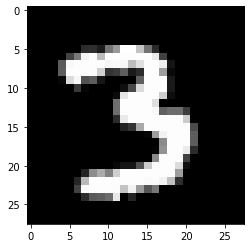

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
testimage = mnist2.test.images[500].reshape(28,28)
plt.imshow(testimage,cmap="gray")
print(testimage)

In [15]:
test_image = tf.placeholder("float",[28,28])
test = tf.reshape(test_image,[-1])

epochs completed 100.0 %


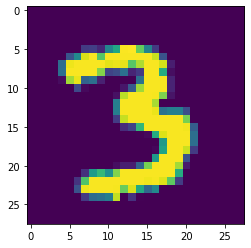

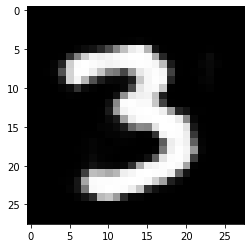

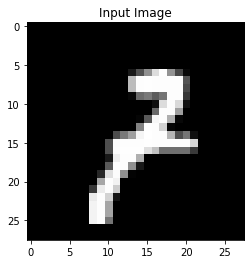

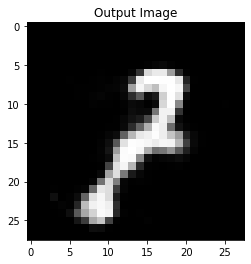

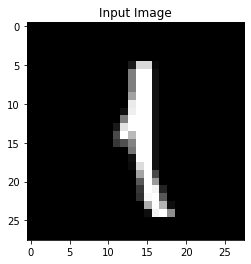

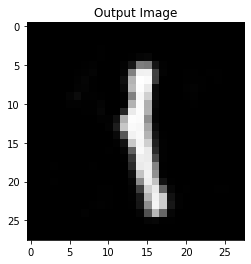

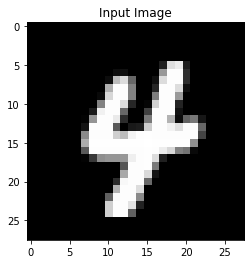

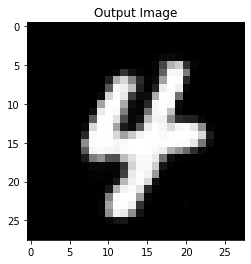

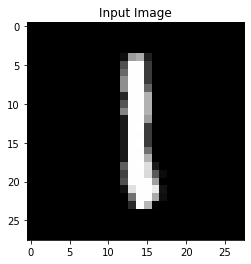

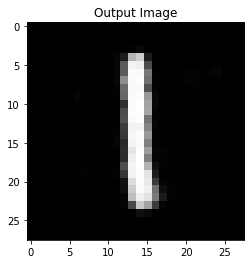

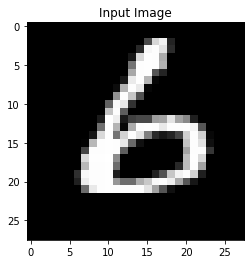

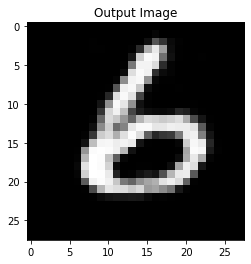

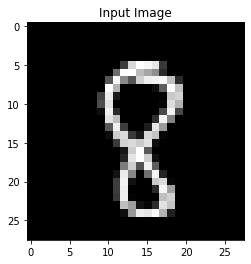

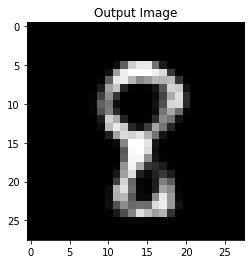

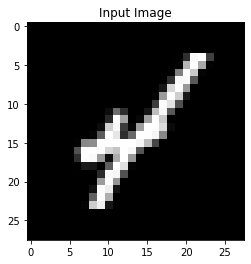

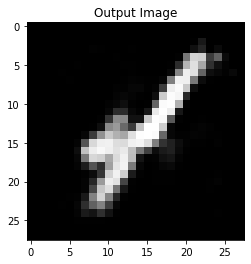

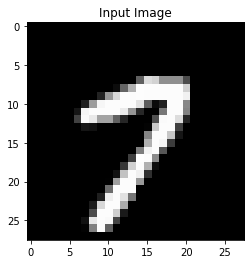

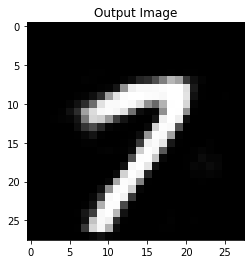

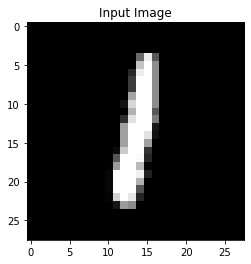

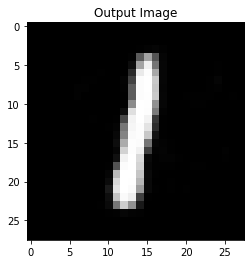

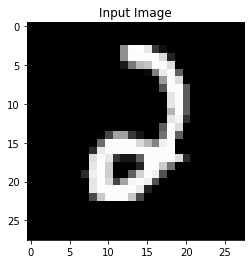

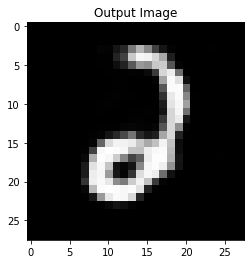

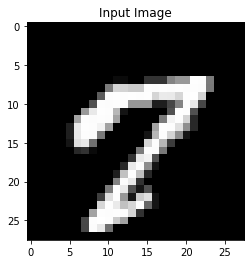

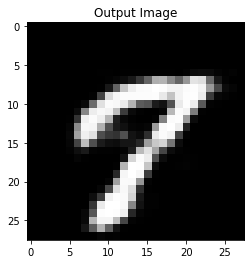

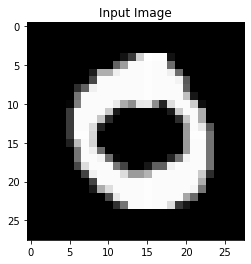

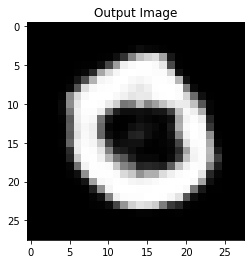

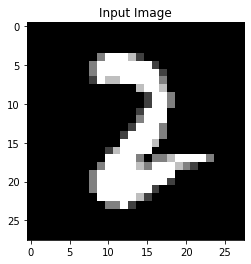

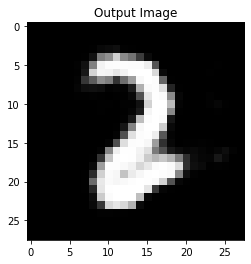

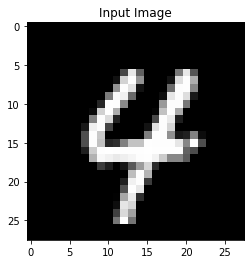

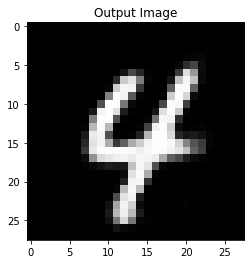

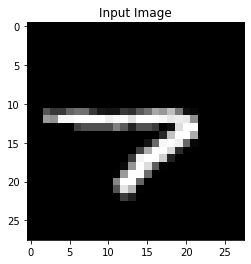

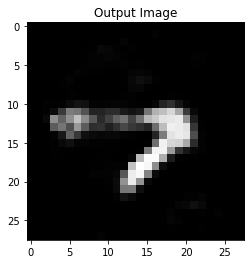

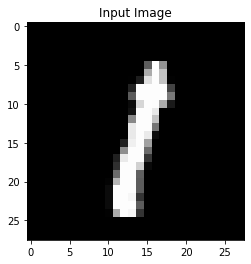

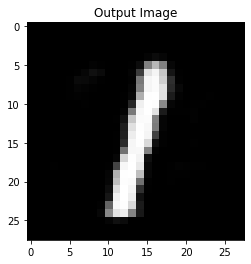

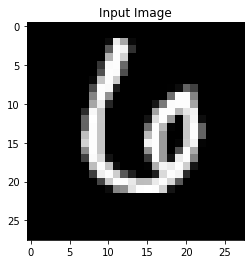

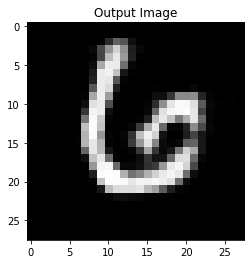

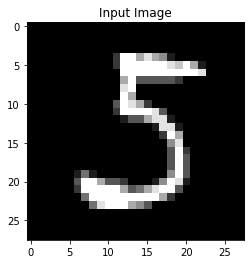

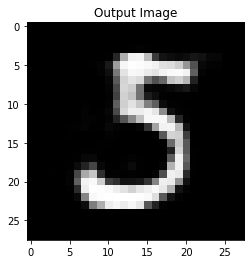

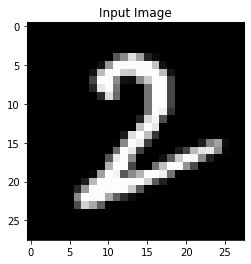

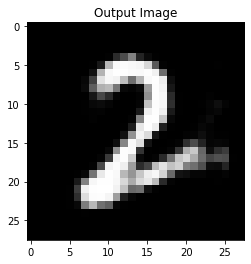

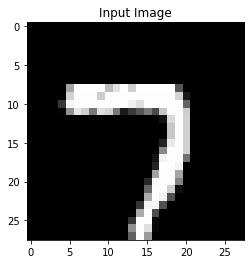

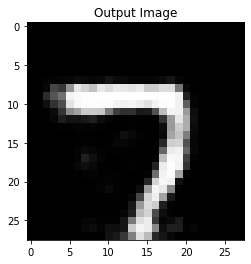

In [16]:
init = tf.global_variables_initializer()
error_list=[]
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epoch):        
        total_batch = int(mnist2.train.num_examples / batch_size)             
        for i in range(total_batch):                     
            batch_xs, batch_ys = mnist2.train.next_batch(batch_size)                  
            sess.run(optimizer,feed_dict={
                x:batch_xs,
                y:batch_xs
            })
        error_list.append(sess.run(loss,feed_dict={
            x: mnist2.test.images,
            y: mnist2.test.images
        }))
        clear_output(wait=True)
        print("epochs completed",((epoch+1)/training_epoch)*100,"%")        
        plt.imshow(mnist2.test.images[500].reshape(28,28))
        plt.show()
        a = sess.run(output_output,feed_dict={
                x:[mnist2.test.images[500]]
            })    
        a = a.reshape(28,28)
        plt.imshow(a,cmap="gray")
        plt.show()
    
    for i in random_indexs:
        
        plt.title("Input Image")
        plt.imshow(x_test[i],cmap='gray')        
        t = sess.run(test,feed_dict={
            test_image:(mnist2.test.images[i]).reshape(28,28)
        })
        plt.show()
        t1 = sess.run(output_output,feed_dict={
        x:[t]
            })   
        t2 = t1.reshape(28,28)*255    
        plt.title("Output Image")
        plt.imshow(t2,cmap="gray")
        plt.show()        
    

0.011375434


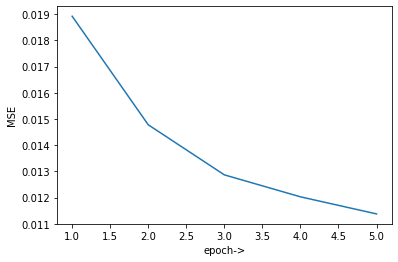

In [17]:
epoch_list = []
for i in range(training_epoch):
    epoch_list.append(i+1)
plt.plot(epoch_list,error_list)
plt.xlabel("epoch->")
plt.ylabel("MSE")
print(error_list[len(error_list)-1])